In [2]:
#!pip install pandas_profiling dtale klib 

In [162]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

In [163]:
from sklearn.model_selection import train_test_split
from sklearn import feature_selection
from sklearn import model_selection
from sklearn.metrics import accuracy_score 
## Everything below is a different model. We use diffirent models so when we get different levels of accuracy, we know which one to work with
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier

# from pandas_profiling import ProfileReport

import warnings
warnings.filterwarnings('ignore')

In [164]:
data=pd.read_csv('Loan_Data.csv')

In [165]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [166]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [167]:
data.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [168]:
#find categorical data so that we can fill columns with null

categorical_data = data.select_dtypes(exclude= np.number)
categorical_col = categorical_data.columns
categorical_data.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,Urban,Y
4,LP001008,Male,No,0,Graduate,No,Urban,Y


In [169]:
#replace null values in categorical columns of dataframe

for cat_col in categorical_col:
    cat_col_mode=data[cat_col].mode()[0]
    data[cat_col].fillna(cat_col_mode,inplace=True)

In [170]:
data.isna().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [171]:
# find numeric data so that we can fill columns with null
numeric_data = data.select_dtypes(include = np.number)
numeric_col = numeric_data.columns
numeric_data.head(5)

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,5849,0.0,NaN,360.0,1.0
1,4583,1508.0,128.0,360.0,1.0
2,3000,0.0,66.0,360.0,1.0
3,2583,2358.0,120.0,360.0,1.0
4,6000,0.0,141.0,360.0,1.0


In [172]:
#replace null values in muneric columns of dataframe with their mean
for num_col in numeric_col:
    num_col_mode=data[num_col].mean()
    data[num_col].fillna(num_col_mode,inplace=True)

In [173]:
# data=data.fillna(method='bfill')
# data.head()

In [174]:
data.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [175]:
# report = ProfileReport(data)#pandas profiler
# report

In [176]:
# #Plotting number of Males against number of Females
# sns.countplot(data['Gender'])

In [177]:
#result=data['Gender'].groupby('Gender').count()
data['Gender'].value_counts()

Gender
Male      502
Female    112
Name: count, dtype: int64

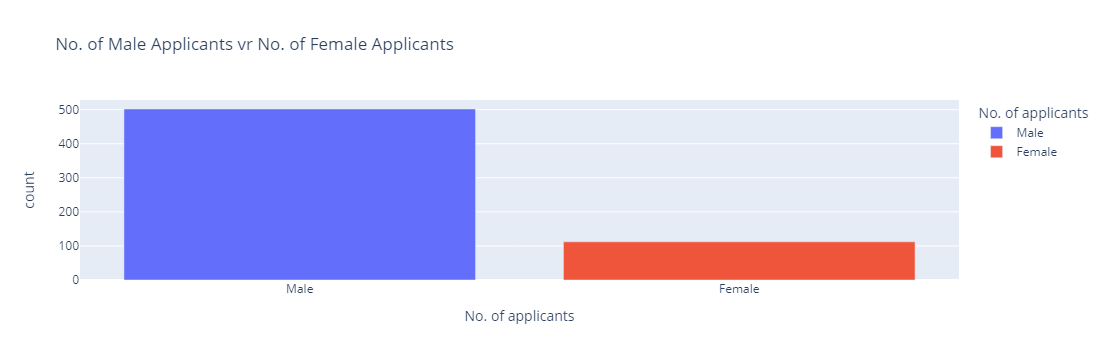

In [178]:
g=pd.DataFrame()
l=data['Gender'].value_counts()

l=l.to_frame()
l.reset_index(inplace=True)
fig=px.bar(l,x='Gender',y='count',
          labels={'index':'Gender','Gender':'No. of applicants'},
          title='No. of Male Applicants vr No. of Female Applicants',
          color = 'Gender')

fig.show()

In [179]:
l.columns

Index(['Gender', 'count'], dtype='object')

In [180]:
#same as above
result=data[['Gender','Married']].groupby('Gender').agg('count')
result.reset_index(inplace=True)
result

,Gender,Married
0,Female,112
1,Male,502


In [181]:
#Approval of loans between Males & Females
result=data[['Gender','Loan_Status','Dependents']].\
groupby(['Loan_Status','Gender']).agg('count')
result.reset_index(inplace=True)
result

,Loan_Status,Gender,Dependents
0,N,Female,37
1,N,Male,155
2,Y,Female,75
3,Y,Male,347


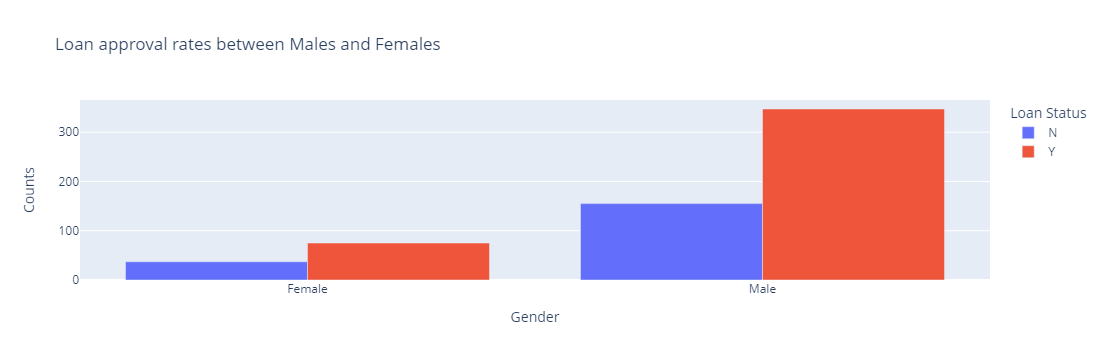

In [182]:
fig=px.bar(result,x='Gender',y='Dependents',
          
          title='Loan approval rates between Males and Females',
          color='Loan_Status',
          labels={'Dependents':'Counts','Loan_Status':'Loan Status'},)
fig.update_layout(barmode='group')
fig.show()
#the rate of approval and rejection is higher for males

In [183]:
#same as above
result=pd.crosstab(data.Gender,data.Loan_Status, margins = True)
result.reset_index(inplace=True)
result

Loan_Status,Gender,N,Y,All
0,Female,37,75,112
1,Male,155,347,502
2,All,192,422,614


In [184]:

result=pd.crosstab(data['Dependents'] , data['Loan_Status'], margins = True)
result.reset_index(inplace=True)
result[:4]

Loan_Status,Dependents,N,Y,All
0,0,113,247,360
1,1,36,66,102
2,2,25,76,101
3,3+,18,33,51


In [185]:
#same as above
#No of dependents
result=data[['Gender','Loan_Status','Dependents']].groupby(['Loan_Status','Dependents']).agg('count')
result.reset_index(inplace=True)
result

,Loan_Status,Dependents,Gender
0,N,0,113
1,N,1,36
2,N,2,25
3,N,3+,18
4,Y,0,247
5,Y,1,66
6,Y,2,76
7,Y,3+,33


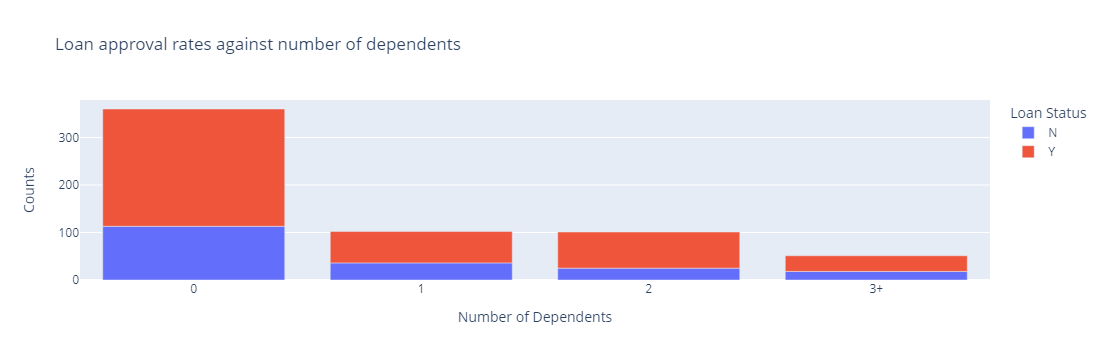

In [186]:
fig=px.bar(result,x='Dependents',y='Gender',
          color='Loan_Status',
          labels={'Loan_Status':'Loan Status','Gender':'Counts',
                  'Dependents':'Number of Dependents'},
          title='Loan approval rates against number of dependents')
fig.show()
#it appears applicants with less number of dependents tend to get their 
# loans approved as compared with those with larger number of dependents
# as shown in the visualization. It can also be observed that, those with
#less number of dependents are more compared with those with large number 
#of dependents

<Axes: ylabel='count'>

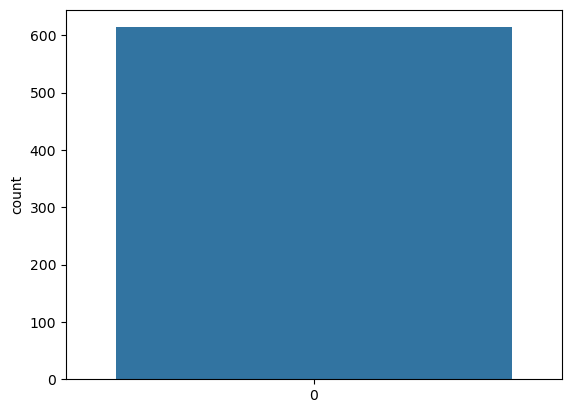

In [187]:
#approval rates for applicants with credit history 
#and those without credit history
sns.countplot(data['Credit_History'])

In [188]:
result=data[['Loan_Status','Credit_History']].\
groupby(['Loan_Status']).agg('count')
result.reset_index(inplace=True)
result

,Loan_Status,Credit_History
0,N,192
1,Y,422


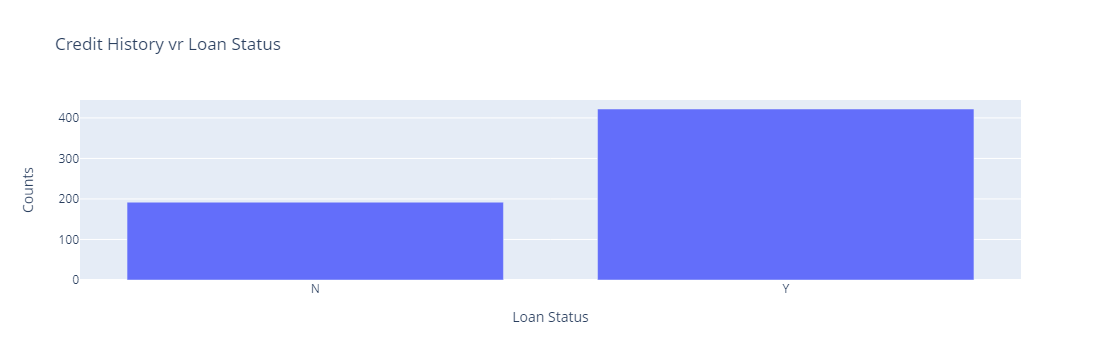

In [189]:
fig=px.bar(result,x='Loan_Status',y='Credit_History',
          labels={'Loan_Status':'Loan Status','Credit_History':'Counts'},
          title='Credit History vr Loan Status')
fig.show()
#applicants with a credit history seems to have a high approval rate

In [190]:
#get counts of applicants who are self employed or not
result=data[['Loan_Status','Self_Employed']].\
groupby(['Loan_Status']).agg('count')
result.reset_index(inplace=True)
result

,Loan_Status,Self_Employed
0,N,192
1,Y,422


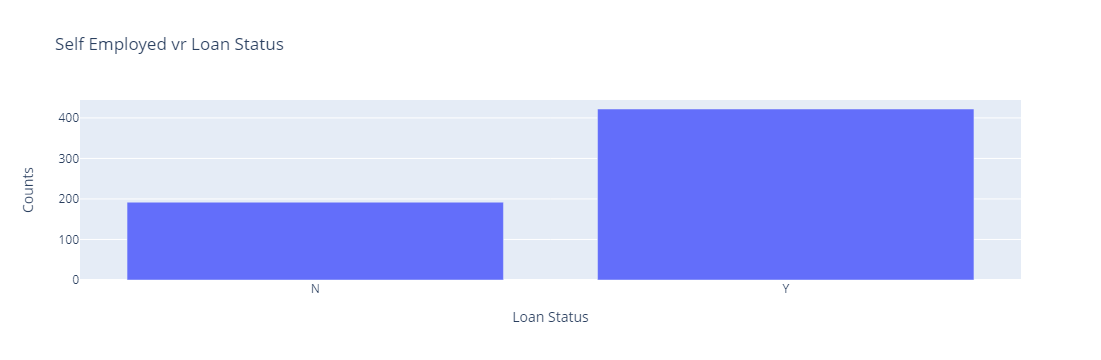

In [191]:
fig=px.bar(result,x='Loan_Status',y='Self_Employed',
          labels={'Loan_Status':'Loan Status','Self_Employed':'Counts'},
          title='Self Employed vr Loan Status')
fig.show()
#applicants who are self employed seems to have a high approval rate

In [192]:
#get counts of applicants who are married or not
result=data[['Loan_Status','Married']].\
groupby(['Loan_Status']).agg('count')
result.reset_index(inplace=True)
result
#more married applicants had their loans approved than those not married

,Loan_Status,Married
0,N,192
1,Y,422


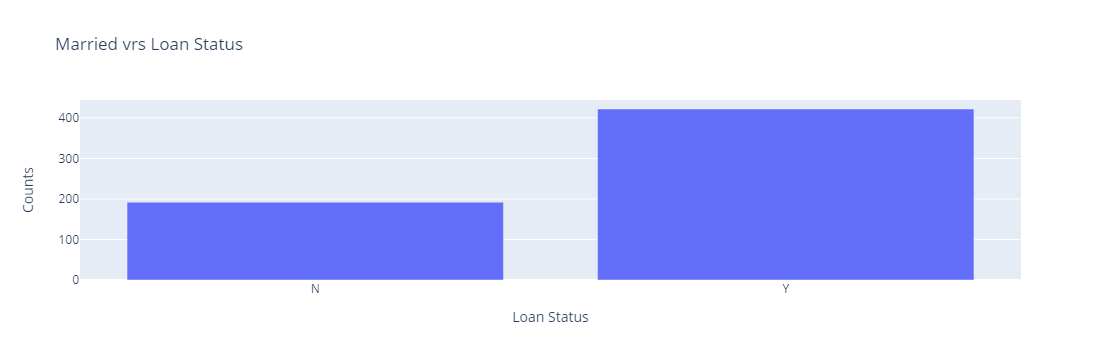

In [193]:
fig=px.bar(result,x='Loan_Status',y='Married',
          labels={'Loan_Status':'Loan Status','Married':'Counts'},
          title='Married vrs Loan Status')
fig.show()

In [194]:
pd.crosstab(data.Married , data.Loan_Status,margins = True)

Loan_Status,N,Y,All
Married,,,
No,79,134,213
Yes,113,288,401
All,192,422,614


In [195]:
#get counts of applicants who are graduates and those who are not
result=data[['Loan_Status','Education','Married']].\
groupby(['Education','Loan_Status']).agg('count')
result.reset_index(inplace=True)
result
# applicants who are graduates had their loans approved than those who are not 

,Education,Loan_Status,Married
0,Graduate,N,140
1,Graduate,Y,340
2,Not Graduate,N,52
3,Not Graduate,Y,82


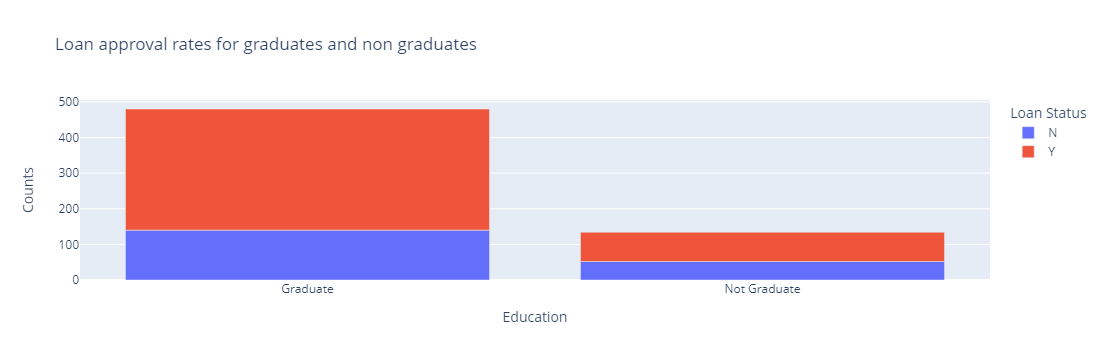

In [196]:
fig=px.bar(result,x='Education',y='Married',
          color='Loan_Status',
          labels={'Loan_Status':'Loan Status','Married':'Counts',},
          title='Loan approval rates for graduates and non graduates')
fig.show()

In [197]:
#get counts of applicants who are maried or not
result=data[['Loan_Status','Property_Area','Married']].\
groupby(['Loan_Status','Property_Area']).agg('count')
result.reset_index(inplace=True)
result
#there are more applicants from semiurban areas

,Loan_Status,Property_Area,Married
0,N,Rural,69
1,N,Semiurban,54
2,N,Urban,69
3,Y,Rural,110
4,Y,Semiurban,179
5,Y,Urban,133


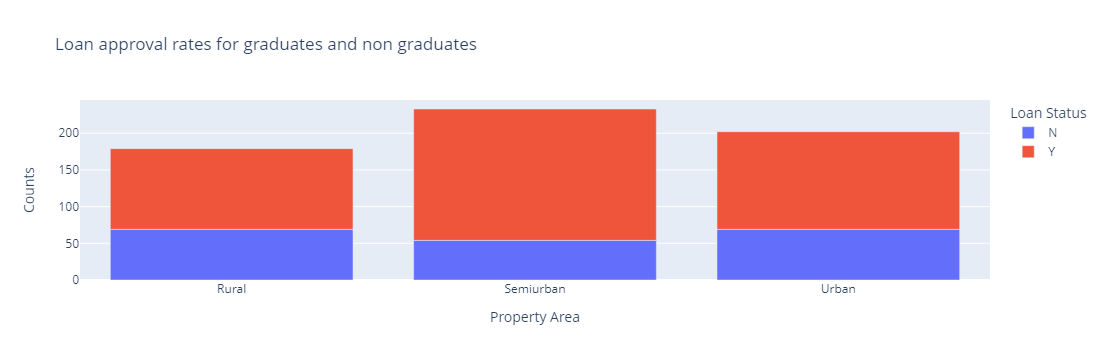

In [198]:
fig=px.bar(result,x='Property_Area',y='Married',
          color='Loan_Status',
          labels={'Loan_Status':'Loan Status','Married':'Counts',
                  'Property_Area':'Property Area'},
          title='Loan approval rates for graduates and non graduates')
fig.show()

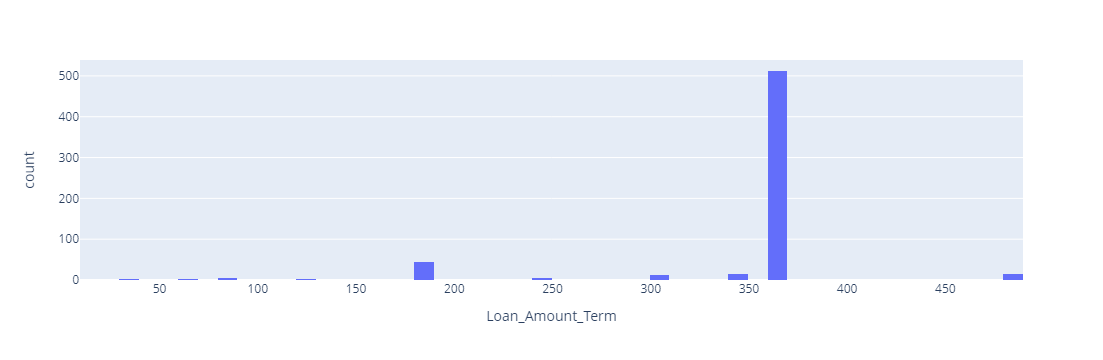

In [199]:
#histogram for loan amount term
fig = px.histogram(data, x="Loan_Amount_Term", 
                   )
fig.show()

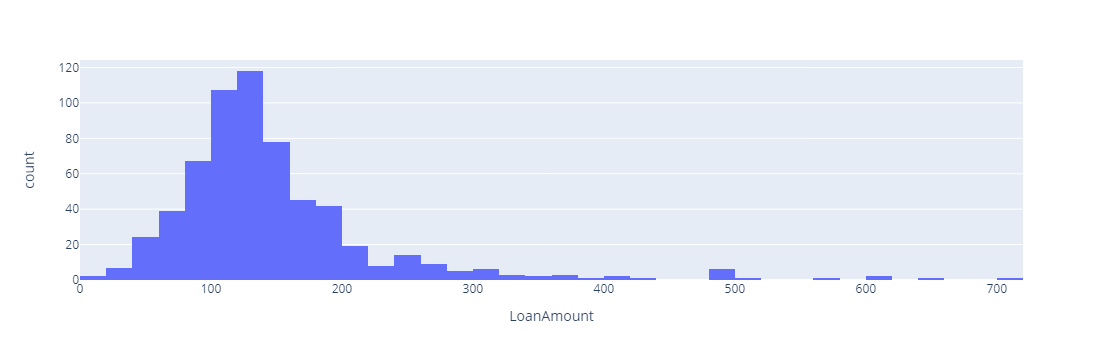

In [200]:
#histogram for loan amount 
fig = px.histogram(data, x="LoanAmount", 
                   )
fig.show()



In [201]:
data['LoanAmount'].skew()

2.726601144105299

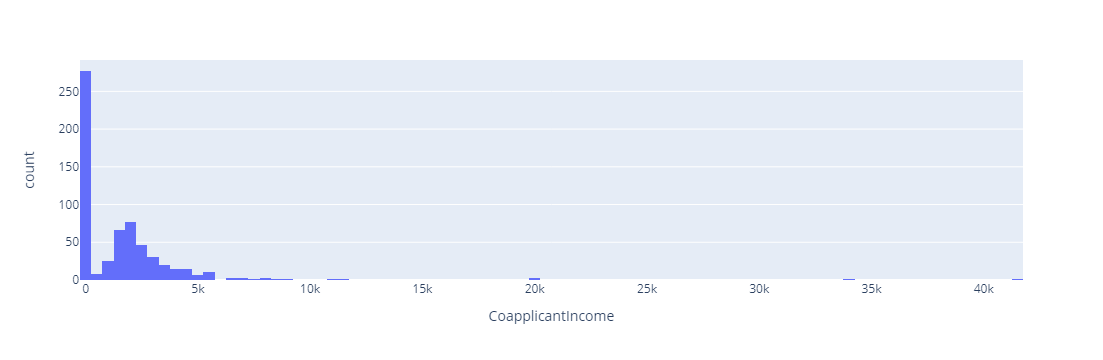

In [202]:
#histogram for coapplicant income 
fig = px.histogram(data, x="CoapplicantIncome", 
                   )
fig.show()


In [203]:
data['CoapplicantIncome'].skew()

7.491531216657306

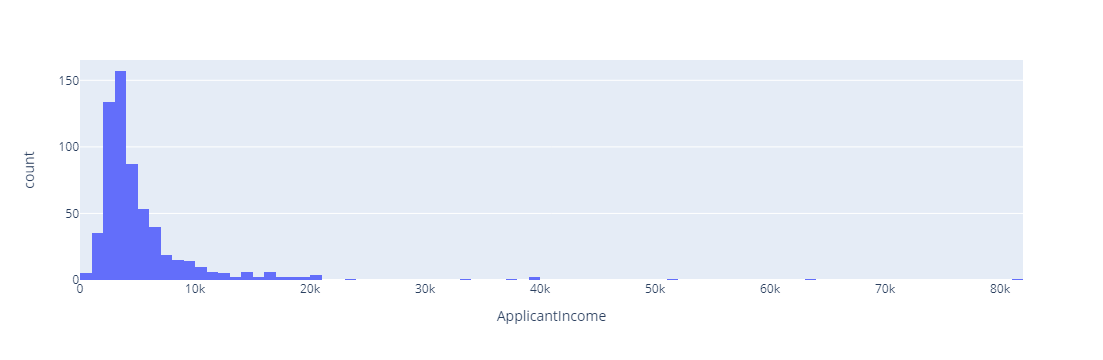

In [204]:
#histogram for applicant income 
fig = px.histogram(data, x="ApplicantIncome", 
                   )
fig.show()
#applicant income  too is right skewed

In [205]:
data['ApplicantIncome'].skew()

6.539513113994625

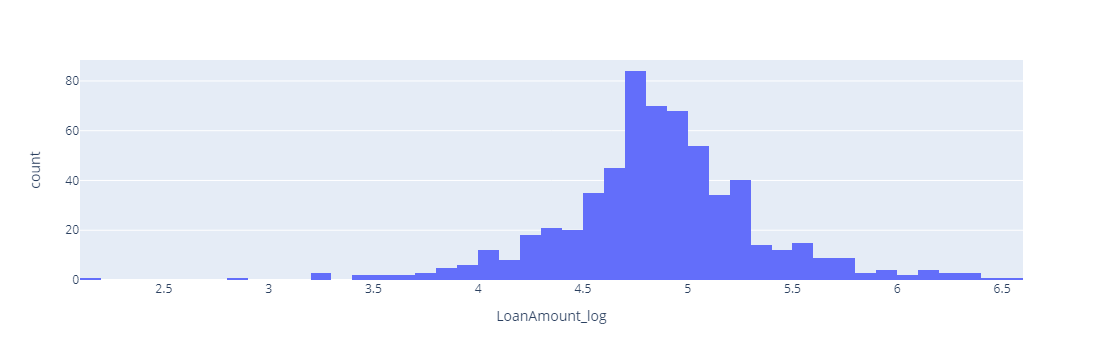

-0.22322704759640444


In [206]:
#Normalising the LoanAmount with the log function
data['LoanAmount_log'] = np.log(data['LoanAmount'])

fig = px.histogram(data, x="LoanAmount_log", 
                   )
fig.show()
print(data['LoanAmount_log'].skew())

In [158]:
## data.rename(columns={'Male':'Gender'})

In [207]:
#categorical values to numerical values


gender = pd.get_dummies(data['Gender'] , drop_first = True )
data.drop(['Gender'], axis = 1 , inplace =True)
data = pd.concat([data , gender ] , axis = 1)


married = pd.get_dummies(data['Married'] , prefix = 'married', 
                         drop_first = True )
data.drop(['Married'], axis = 1 , inplace =True)
data = pd.concat([data , married ] , axis = 1)

self_Employed = pd.get_dummies(data['Self_Employed'] ,
                               prefix = 'employed' ,drop_first = True )
data.drop(['Self_Employed'], axis = 1 , inplace =True)
data = pd.concat([data , self_Employed ] , axis = 1)

#replacing values in the dependent column
replace_values = {'0':'0', '1':'1', '2':'2', '3+':'3'}

data['Dependents'] = data['Dependents'].\
replace(replace_values).astype(int)




In [208]:
data.head()

,Loan_ID,Dependents,Education,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log,Male,married_Yes,employed_Yes
0,LP001002,0,Graduate,5849,0.0,146.412162,360.0,1.0,Urban,Y,4.986426,True,False,False
1,LP001003,1,Graduate,4583,1508.0,128.000000,360.0,1.0,Rural,N,4.852030,True,True,False
2,LP001005,0,Graduate,3000,0.0,66.000000,360.0,1.0,Urban,Y,4.189655,True,True,True
3,LP001006,0,Not Graduate,2583,2358.0,120.000000,360.0,1.0,Urban,Y,4.787492,True,True,False
4,LP001008,0,Graduate,6000,0.0,141.000000,360.0,1.0,Urban,Y,4.948760,True,False,False


In [209]:
data['Education'] = data['Education'].\
map( {'Graduate': 0, 'Not Graduate': 1} ).astype(int)

data['Property_Area'] = data['Property_Area'].\
map( {'Urban': 0, 'Semiurban': 1 ,'Rural': 2  } ).astype(int)

In [210]:
data.head()

,Loan_ID,Dependents,Education,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log,Male,married_Yes,employed_Yes
0,LP001002,0,0,5849,0.0,146.412162,360.0,1.0,0,Y,4.986426,True,False,False
1,LP001003,1,0,4583,1508.0,128.000000,360.0,1.0,2,N,4.852030,True,True,False
2,LP001005,0,0,3000,0.0,66.000000,360.0,1.0,0,Y,4.189655,True,True,True
3,LP001006,0,1,2583,2358.0,120.000000,360.0,1.0,0,Y,4.787492,True,True,False
4,LP001008,0,0,6000,0.0,141.000000,360.0,1.0,0,Y,4.948760,True,False,False


In [211]:
data['Male'] = data['Male'].\
map( {False: 0, True: 1} ).astype(int)

In [212]:
data.head()

,Loan_ID,Dependents,Education,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log,Male,married_Yes,employed_Yes
0,LP001002,0,0,5849,0.0,146.412162,360.0,1.0,0,Y,4.986426,1,False,False
1,LP001003,1,0,4583,1508.0,128.000000,360.0,1.0,2,N,4.852030,1,True,False
2,LP001005,0,0,3000,0.0,66.000000,360.0,1.0,0,Y,4.189655,1,True,True
3,LP001006,0,1,2583,2358.0,120.000000,360.0,1.0,0,Y,4.787492,1,True,False
4,LP001008,0,0,6000,0.0,141.000000,360.0,1.0,0,Y,4.948760,1,False,False


In [213]:
data['married_Yes'] = data['married_Yes'].\
map( {False: 0, True: 1} ).astype(int)

In [214]:
data.head()

,Loan_ID,Dependents,Education,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log,Male,married_Yes,employed_Yes
0,LP001002,0,0,5849,0.0,146.412162,360.0,1.0,0,Y,4.986426,1,0,False
1,LP001003,1,0,4583,1508.0,128.000000,360.0,1.0,2,N,4.852030,1,1,False
2,LP001005,0,0,3000,0.0,66.000000,360.0,1.0,0,Y,4.189655,1,1,True
3,LP001006,0,1,2583,2358.0,120.000000,360.0,1.0,0,Y,4.787492,1,1,False
4,LP001008,0,0,6000,0.0,141.000000,360.0,1.0,0,Y,4.948760,1,0,False


In [215]:
data['employed_Yes'] = data['employed_Yes'].\
map( {False: 0, True: 1} ).astype(int)

In [216]:
data.head()

,Loan_ID,Dependents,Education,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log,Male,married_Yes,employed_Yes
0,LP001002,0,0,5849,0.0,146.412162,360.0,1.0,0,Y,4.986426,1,0,0
1,LP001003,1,0,4583,1508.0,128.000000,360.0,1.0,2,N,4.852030,1,1,0
2,LP001005,0,0,3000,0.0,66.000000,360.0,1.0,0,Y,4.189655,1,1,1
3,LP001006,0,1,2583,2358.0,120.000000,360.0,1.0,0,Y,4.787492,1,1,0
4,LP001008,0,0,6000,0.0,141.000000,360.0,1.0,0,Y,4.948760,1,0,0


In [217]:
#converting the target variable (column) to numerical values
data['Loan_Status'] = data['Loan_Status'].\
map( {'N': 0, 'Y': 1 } ).astype(int)

In [218]:
data.head()

,Loan_ID,Dependents,Education,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log,Male,married_Yes,employed_Yes
0,LP001002,0,0,5849,0.0,146.412162,360.0,1.0,0,1,4.986426,1,0,0
1,LP001003,1,0,4583,1508.0,128.000000,360.0,1.0,2,0,4.852030,1,1,0
2,LP001005,0,0,3000,0.0,66.000000,360.0,1.0,0,1,4.189655,1,1,1
3,LP001006,0,1,2583,2358.0,120.000000,360.0,1.0,0,1,4.787492,1,1,0
4,LP001008,0,0,6000,0.0,141.000000,360.0,1.0,0,1,4.948760,1,0,0


In [23]:
#dropping loan id 
data.drop(['Loan_ID'], axis = 1 , inplace =True)

In [24]:
data.head(2)

,Dependents,Education,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Male,married_Yes,employed_Yes
0,0,0,5849,0.0,128.0,360.0,1.0,0,1,1,0,0
1,1,0,4583,1508.0,128.0,360.0,1.0,2,0,1,1,0


In [25]:
data.rename(columns={'Male':'Gender',
                      'employed_Yes':'Self_Employed',
                      'married_Yes':'Marital_Status'},inplace=True)

In [26]:
data.head(2)

,Dependents,Education,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Gender,Marital_Status,Self_Employed
0,0,0,5849,0.0,128.0,360.0,1.0,0,1,1,0,0
1,1,0,4583,1508.0,128.0,360.0,1.0,2,0,1,1,0


In [27]:
data['Self_Employed'].value_counts()

0    528
1     86
Name: Self_Employed, dtype: int64

In [ ]:
# exploring relationships in dataset with pairplot
#useful for grasping the most important relationships without 
#having to go through every single combination manually but it is 
#computationally expensive
sns.pairplot(data)

In [28]:
#The best way to understand the relationship between a numeric 
#variable and a categorical variable is through a boxplot.
sns.catplot(x="Loan_Status", y="", data=df, kind="box", aspect=1.5)
plt.title("Loan Status vs ")
plt.show()

NameError: name 'sns' is not defined

# Starting with modeling

In [31]:
X = data.drop('Loan_Status' , axis = 1 )
y = data['Loan_Status']

X_train ,X_test , y_train , y_test = \
train_test_split(X , y , test_size = 0.3 , random_state =102)

In [32]:
#logistic regression
logistic_model = LogisticRegression()
logistic_model.fit(X_train , y_train)
logistic_pred = logistic_model.predict(X_test)
logistic_accuracy = accuracy_score(y_test , logistic_pred)*100
logistic_accuracy

83.78378378378379

In [33]:
#random forest
random_forest_model = RandomForestClassifier(n_estimators= 120)
random_forest_model.fit(X_train, y_train)
random_forest_pred = random_forest_model.predict(X_test)
random_forest_accuracy = accuracy_score(y_test , random_forest_pred )*100
random_forest_accuracy

82.16216216216216

In [34]:
#K- Nearest Neighbors
knn_model = KNeighborsClassifier(n_neighbors = 3)
knn_model.fit(X_train, y_train)
knn_pred = knn_model.predict(X_test)
knn_accuracy = accuracy_score(y_test , knn_pred)*100
knn_accuracy

64.32432432432432

In [35]:
#Naive Bayes
naive_bayes_gaussian = GaussianNB()
naive_bayes_gaussian.fit(X_train, y_train)
nbg_pred = naive_bayes_gaussian.predict(X_test)
nbg_accuracy = accuracy_score(y_test , nbg_pred)*100
nbg_accuracy

82.70270270270271

In [36]:
#support vector machine
svc_model = SVC()
svc_model.fit(X_train, y_train)
svm_pred = svc_model.predict(X_test)
svm_accuracy = accuracy_score(y_test , svm_pred)*100
svm_accuracy

70.27027027027027

In [37]:
#Gradient Boosting Classifier
gbc_model = GradientBoostingClassifier()
gbc_model.fit(X_train, y_train)
gbc_pred = gbc_model.predict(X_test)
gbc_accuracy = accuracy_score(y_test , gbc_pred)*100
gbc_accuracy 

79.45945945945945

In [38]:
#putting models together and arranging their accuracies
model_name=['logistic regression','random forest','K-Nearest Neighbor','Naive Base',
            'support vector machine','Gradient Boosting Classifier']

model_accuracies=[logistic_accuracy,random_forest_accuracy,
                  knn_accuracy,nbg_accuracy,svm_accuracy,gbc_accuracy]

model_list=[model_name,model_accuracies]
model_df=pd.DataFrame(model_list).T#T=transpose
cols=['model','accuracy']
model_df.columns=cols
model_df.sort_values(by='accuracy',ascending=False)

,model,accuracy
0,logistic regression,83.783784
3,Naive Base,82.702703
1,random forest,82.162162
5,Gradient Boosting Classifier,79.459459
4,support vector machine,70.27027
2,K-Nearest Neighbor,64.324324


In [39]:
#saving best model to file using pickle
import pickle# you can also use joblib to save the model
model_filename = "loan_prediction_model.sav"

loan_prediction_model = pickle.dump(logistic_model, open(model_filename,'wb'))


In [ ]:
X_train.head(2)

In [ ]:
#loading saved model for prediction
model_filename = "loan_prediction_model.sav"

loan_prediction_model = pickle.load(open(model_filename, 'rb'))
#dependents- 1 to 3,education-graduate=0,1 applicant income any number,
#coapplicant income any number, loan amount any number, 
#loan amount term- number of months or loan duration,
#credit history 1=yes,0 property area: 'Urban': 0, 'Semiurban': 1 ,'Rural': 2 
#, gender 1=male, 0 female
#marital status yes=1,0, self employed no=0
values=[0,0,510,200,700,360,1,0,1,0,1]
df=pd.DataFrame([values])
df.columns=X_train.columns
#df
result = loan_prediction_model.predict(df)

result[0]

In [ ]:
X_train.columns